In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [18]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [3]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

## Análisis exploratorio de datos (EDA)

In [4]:
#profile = pp.ProfileReport(df, title='Pandas Profiling Report', minimal=True)
#profile.to_file('../data/reports/Data_salary.html')

#### Preguntas de exploración

1. ¿Qué variables influyen en el valor facturado por los profesionales?
* Salario anual de acuerdo a:
- Nivel de educación
- Género
- Cargo
- Empresa
- Experiencia
2. ¿Qué variables influyen en el % de participación de estos profesionales?

In [13]:
s_a = df.groupby(['totalyearlycompensation']).mean()
ssss = df.groupby('Education').mean()
ssss

#nivel_educacion = df.groupby(['Education','totalyearlycompensation']).size()
#nivel_educacion

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
Education,,,,,,
Bachelor's Degree,165376.822524,5.790096,2.170186,119154.432713,32510.306687,13774.509804
Highschool,173090.000000,7.543333,2.150000,122080.000000,35950.000000,15123.333333
Master's Degree,204125.052250,7.121325,2.477870,140550.229901,45553.782918,18055.663926
No especificado,206215.082321,6.542260,2.363592,129717.402457,44230.033357,16327.618666
PhD,258606.382979,6.025266,2.462566,163761.968085,70706.781915,24203.457447
Some College,187184.713376,8.605096,2.461783,132716.560510,38958.598726,15582.802548


In [9]:
df_1 = df.groupby("Education").agg({"totalyearlycompensation":"mean"})
df_1

,totalyearlycompensation
Education,
Bachelor's Degree,165376.822524
Highschool,173090.000000
Master's Degree,204125.052250
No especificado,206215.082321
PhD,258606.382979
Some College,187184.713376


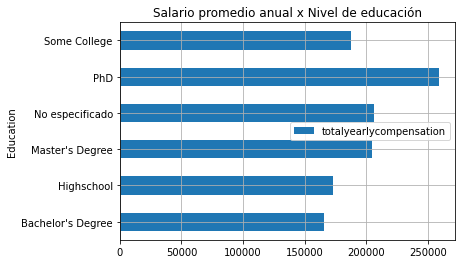

In [25]:
df_1.plot.barh(title="Salario promedio anual x Nivel de educación").grid()

In [59]:
df_2 = df.groupby("gender").agg({"totalyearlycompensation":"mean"})
df_2#.plot(kind="pie")

,totalyearlycompensation
gender,
Female,186004.488330
Male,194675.540095
No especificado,209690.642303
Other,210198.924731


In [46]:
df_3 = df.groupby('company').agg({"totalyearlycompensation":"mean"})
df_3.head()

,totalyearlycompensation
company,
10x Genomics,193333.333333
23andMe,153428.571429
2U,145571.428571
3M,112200.000000
3m,93500.000000


In [5]:
#Se agrupa por compañía
x_compania = df.groupby(['company']).mean()
x_compania.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
company,,,,,,
10x Genomics,193333.333333,3.166667,0.666667,149666.666667,27666.666667,15166.666667
23andMe,153428.571429,3.142857,0.857143,116428.571429,17000.000000,0.000000
2U,145571.428571,8.000000,2.428571,129142.857143,3428.571429,13000.000000
3M,112200.000000,6.300000,3.350000,103150.000000,1000.000000,8250.000000
3m,93500.000000,3.500000,1.500000,90000.000000,0.000000,3500.000000


In [6]:
top_company= df["company"].value_counts().reset_index()
top_company.columns = ["company", "totalyearlycompensation"]
top_company

,company,totalyearlycompensation
0,Amazon,7583
1,Microsoft,4749
2,Google,4031
3,Facebook,2626
4,Apple,1934
...,...,...
1612,ARUBA,1
1613,fortinet,1
1614,Nxp semiconductors,1
1615,GENERAL ATOMICS,1


In [7]:
prom_sal_anual = pd.concat([df['totalyearlycompensation'],df['company']], axis = 1)
prom_sal_anual

,totalyearlycompensation,company
0,127000,Oracle
1,100000,eBay
2,310000,Amazon
3,372000,Apple
4,157000,Microsoft
...,...,...
58357,327000,Google
58358,237000,Microsoft
58359,220000,MSFT
58360,280000,Salesforce


In [8]:
df.groupby(['company']).mean()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
company,,,,,,
10x Genomics,193333.333333,3.166667,0.666667,149666.666667,27666.666667,15166.666667
23andMe,153428.571429,3.142857,0.857143,116428.571429,17000.000000,0.000000
2U,145571.428571,8.000000,2.428571,129142.857143,3428.571429,13000.000000
3M,112200.000000,6.300000,3.350000,103150.000000,1000.000000,8250.000000
3m,93500.000000,3.500000,1.500000,90000.000000,0.000000,3500.000000
...,...,...,...,...,...,...
zoom,100000.000000,2.000000,6.000000,0.000000,0.000000,0.000000
zoominfo,150000.000000,13.000000,0.000000,145000.000000,5000.000000,0.000000
zoox,228666.666667,10.333333,3.333333,191666.666667,27000.000000,10000.000000
